In [14]:
%matplotlib inline
from matplotlib.pyplot import plot

from redis import StrictRedis
from activetick_http import ActiveTick
from datetime import datetime
import pandas as pd

at = ActiveTick(cache=StrictRedis(host='127.0.0.1'))
def drop_dupe_index(df):
    return df[~df.index.duplicated()]

In [15]:
beginTime = datetime(2016, 9, 29, 10, 40)
endTime = datetime(2016, 9, 29, 10, 50)
trades = at.tickData('GDX', trades=True, quotes=False, beginTime=beginTime, endTime=endTime)
quotes = at.tickData('GDX', trades=False, quotes=True, beginTime=beginTime, endTime=endTime)

In [16]:
mid = (quotes['ask'] + quotes['bid'])/2
mid = drop_dupe_index(mid).dropna()

In [17]:
# difference between the last executed trade and the mid point between bid/ask
diff = mid - trades['last']
diff = drop_dupe_index(diff).dropna()

ValueError: buffer source array is read-only

In [9]:
mid = mid - float(mid[0])
last = drop_dupe_index(trades['last'])
last = last - float(last[0])

df = pd.concat([mid, diff, last], axis=1).dropna(axis=0, how='any')
df.columns = ['mid', 'diff', 'last']
df.plot()

NameError: name 'diff' is not defined

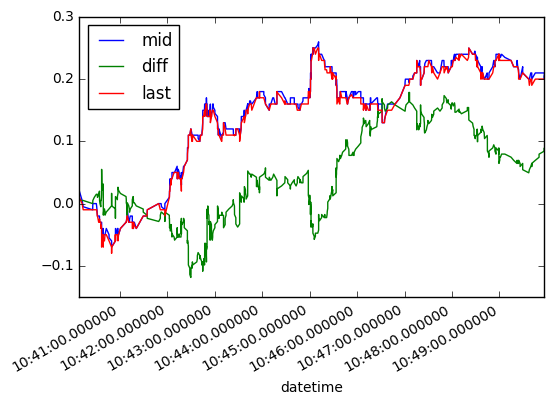

In [130]:
diff = diff.cumsum()
df = pd.concat([mid, diff, last], axis=1).dropna(axis=0, how='any')
df.columns = ['mid', 'diff', 'last']
df.plot()